# **ЭКОНОМЕТРИКА**
## Домашняя работа №4

## *Модели регрессии*

### **Задание.**
### Сгенерируйте свой индивидуальный вариант в соответствии с инструкцией. Затем выполните задание, используя R и Python. Решение оформите в формате word с включением всех необходимых математических формул, гипотез статистических тестов и выводов. В приложение вынесите код и скрины реализации кода.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.stats as smd
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('./9.txt', sep = '	', decimal = ',').astype('float')
y = data["y"]
x1 = data["x1"]
x2 = data["x2"]
x3 = data["x3"]
data

,y,x1,x2,x3
1,135.750669,81.194462,28.525444,52.152226
2,135.126265,81.181577,29.742445,51.650061
3,135.811606,81.425460,29.757179,50.031976
4,136.004092,81.974309,29.234541,51.210147
5,133.570461,80.016322,29.744077,51.323134
...,...,...,...,...
296,136.272193,82.586120,30.876906,49.006820
297,136.208140,82.148104,29.552497,49.634414
298,133.571785,80.161587,27.836560,50.875037
299,134.705414,82.046298,30.210145,51.703677


#### 1. Отберите факторы на основе анализа матрицы парных корреляций. Постройте диаграммы рассеяния с выбранными факторами и зависимой переменной.

Y & X1


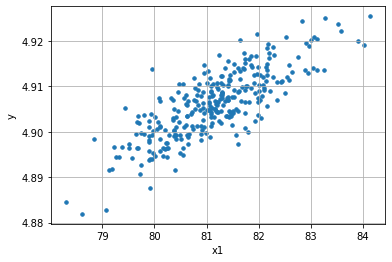

Корреляция: 0.8041342028686278


In [3]:
print('Y & X1')
pd.DataFrame(np.array([x1, y.apply(np.log)]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

x1_corr = np.corrcoef(x1, y)[0, 1]
print('Корреляция:' , x1_corr)

Y & X2


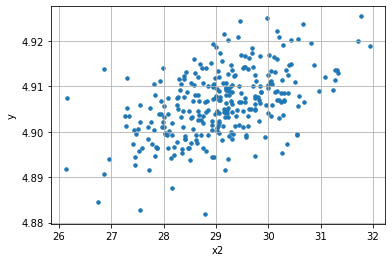

Корреляция: 0.5030958431999591


In [4]:
print('Y & X2')
pd.DataFrame(np.array([x2, y.apply(np.log)]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

x2_corr = np.corrcoef(x2, y)[0, 1]
print('Корреляция:' , x2_corr)

Y & X3


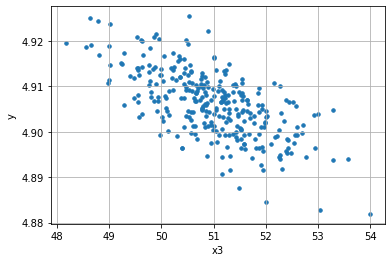

Корреляция: -0.6553395174844641


In [5]:
print('Y & X3')
pd.DataFrame(np.array([x3, y.apply(np.log)]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('x3')
plt.ylabel('y')
plt.show()

x3_corr = np.corrcoef(x3, y)[0, 1]
print('Корреляция:' , x3_corr)

Наиболее сильная зависимость наблюдается между y и x1


#### 2. Постройте две модели регрессии:
    
    a) Парную

In [6]:
p_model = sm.ols(formula="y ~ x1", data=data)
p_results = p_model.fit()
p_df = pd.read_html(p_results.summary().tables[1].as_html(),header=0,index_col=0)[0]
p_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     545.3
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           2.78e-69
Time:                        22:15:03   Log-Likelihood:                -269.12
No. Observations:                 300   AIC:                             542.2
Df Residuals:                     298   BIC:                             549.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.2396      2.864     23.824      0.000      62.603      73.877
x1             0.8244      0.035     23.352      0.000       0.755       0.894
==============================================================================
Omnibus:                        0.697   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.690
Skew:                           0.116   Prob(JB):                        0.708
Kurtosis:                       2.957   Cond. No.                     6.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    b) Множественную

In [7]:
m_model = sm.ols(formula="y ~ x1 + x2 + x3", data=data)
m_results = m_model.fit()
m_df = pd.read_html(m_results.summary().tables[1].as_html(),header=0,index_col=0)[0]
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     310.1
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           5.28e-91
Time:                        22:15:03   Log-Likelihood:                -211.96
No. Observations:                 300   AIC:                             431.9
Df Residuals:                     296   BIC:                             446.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.6382      4.086     23.898      0.000      89.598     105.679
x1             0.7236      0.046     15.573      0.000       0.632       0.815
x2            -0.0885      0.042     -2.092      0.037      -0.172      -0.005
x3            -0.3660      0.033    -11.080      0.000      -0.431      -0.301
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.372
Skew:                          -0.019   Prob(JB):                        0.830
Kurtosis:                       2.832   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3. Оцените качество моделей, используя коэффициент детерминации, стандартную ошибку и среднюю относительную ошибку аппроксимации.

In [8]:
print('КОЭФФИЦИЕНТ ДЕТЕРМИНАЦИИ\n\nПарная модель:', p_results.rsquared, '\nМножественная модель:', m_results.rsquared)

КОЭФФИЦИЕНТ ДЕТЕРМИНАЦИИ

Парная модель: 0.6466318162231632 
Множественная модель: 0.7586059139996671


In [9]:
print('СТАНДАРТНАЯ ОШИБКА\n\nПарная модель:\n', p_results.HC0_se, '\n\nМножественная модель:\n', m_results.HC0_se)

СТАНДАРТНАЯ ОШИБКА

Парная модель:
 Intercept    2.928971
x1           0.036067
dtype: float64 

Множественная модель:
 Intercept    4.043658
x1           0.046620
x2           0.042294
x3           0.032442
dtype: float64


In [10]:
print('СРЕДНЯЯ ОТНОСИТЕЛЬНАЯ ОШИБКА АППРОКСИМАЦИИ\n\nПарная модель:', mean_absolute_error(y, p_results.fittedvalues) / y.abs().sum(), 
'\nМножественная модель:', mean_absolute_error(y, m_results.fittedvalues) / y.abs().sum())

СРЕДНЯЯ ОТНОСИТЕЛЬНАЯ ОШИБКА АППРОКСИМАЦИИ

Парная модель: 1.177630862705952e-05 
Множественная модель: 9.742628218983842e-06


#### 4. Проведите тесты на значимость параметров моделей и моделей в целом.

In [11]:
print('ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ\n\nПарная модель:\n', p_results.f_pvalue)

ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ

Парная модель:
 2.781254306050499e-69


p-value < alfa => парная модель регрессии в целом значима

In [12]:
print('Множественная модель:\n', m_results.f_pvalue)

Множественная модель:
 5.280750073098084e-91


p-value < alfa => множественная модель регрессии в целом значима

#### 5. Постройте доверительные интервалы для параметров.

In [13]:
print('ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ\n\nПарная модель:\n', p_results.conf_int(0.05), 
'\n\nМножественная модель:\n', m_results.conf_int(0.05))

ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ

Парная модель:
                    0          1
Intercept  62.602762  73.876518
x1          0.754880   0.893823 

Множественная модель:
                    0           1
Intercept  89.597566  105.678859
x1          0.632154    0.815042
x2         -0.171739   -0.005242
x3         -0.430996   -0.300987


#### 6. Рассчитайте коэффициенты бетта, дельта и эластичности.

In [14]:
p_beta = p_df['coef'].values[1]
m_beta_1 = m_df['coef'].values[1]
m_beta_2 = m_df['coef'].values[2]
m_beta_3 = m_df['coef'].values[3]

print('БЕТТА\n\nПарная модель:\n', p_beta, 
'\n\nМножественная модель:\n', m_beta_1, m_beta_2, m_beta_3)

БЕТТА

Парная модель:
 0.8244 

Множественная модель:
 0.7236 -0.0885 -0.366


In [15]:
p_delta = x1_corr * p_beta / p_results.rsquared
m_delta_1 = x1_corr * m_beta_1 / m_results.rsquared
m_delta_2 = x2_corr * m_beta_2 / m_results.rsquared
m_delta_3 = x3_corr * m_beta_3 / m_results.rsquared

print('ДЕЛЬТА\n\nПарная модель:\n', p_delta, 
'\n\nМножественная модель:\n', m_delta_1, m_delta_2, m_delta_3)

ДЕЛЬТА

Парная модель:
 1.0252020086436782 

Множественная модель:
 0.7670273833325195 -0.0586918468489766 0.31617768721932094


In [16]:
p_elastic = p_beta * x1.mean() / y.mean()
m_elastic_1 = m_beta_1 * x1.mean() / y.mean()
m_elastic_2 = m_beta_2 * x2.mean() / y.mean()
m_elastic_3 = m_beta_2 * x2.mean() / y.mean()

print('ЭЛАСТИЧНОСТИ\n\nПарная модель:\n', p_elastic, 
'\n\nМножественная модель:\n', m_elastic_1, m_elastic_2, m_elastic_3)

ЭЛАСТИЧНОСТИ

Парная модель:
 0.4950084317726777 

Множественная модель:
 0.4344833833463241 -0.01904123638586956 -0.01904123638586956


#### 7. Проверьте модели на выполнение предпосылок о гомоскедастичности и об отсутствии автокорреляции. Используйте тесты: Гольфелда-Квандта, Бреуша-Пагана, Дарбина-Уотсона, Бреуша-Годфри.

In [17]:
print('Гольфелда-Квандта'.upper())
p_GQtest = sms.het_goldfeldquandt(p_results.resid, p_results.model.exog)
m_GQtest = sms.het_goldfeldquandt(m_results.resid, m_results.model.exog)
print('Парная модель:', lzip(['F statistic', 'p-value'], p_GQtest), 
'\nМножественная модель:', lzip(['F statistic', 'p-value'], m_GQtest))

ГОЛЬФЕЛДА-КВАНДТА
Парная модель: [('F statistic', 1.2181036297496088), ('p-value', 0.11563245324620201)] 
Множественная модель: [('F statistic', 1.0183078087398385), ('p-value', 0.45643528776129333)]


In [18]:
print('Бреуша-Пагана'.upper())
p_BPtest = sms.het_breuschpagan(p_results.resid, p_results.model.exog)
m_BPtest = sms.het_breuschpagan(m_results.resid, m_results.model.exog)

print('Парная модель:', lzip(['BP','p-value'], p_BPtest), 
'\nМножественная модель:', lzip(['BP','p-value'], m_BPtest))

БРЕУША-ПАГАНА
Парная модель: [('BP', 0.8565986114548507), ('p-value', 0.3546922998109465)] 
Множественная модель: [('BP', 2.0289676026294834), ('p-value', 0.5664161916454731)]


In [19]:
print('Дарбина-Уотсона'.upper())
p_DWtest = smd.stattools.durbin_watson(p_results.resid)
m_DWtest = smd.stattools.durbin_watson(m_results.resid)

print('Парная модель:', p_DWtest, 
'\nМножественная модель:', m_DWtest)

ДАРБИНА-УОТСОНА
Парная модель: 2.1627493404857248 
Множественная модель: 2.0653635475521877


In [20]:
sms.stattools.durbin_watson(p_results.resid)

2.1627493404857248

In [21]:
print('Бреуша-Годфри'.upper())
p_BGtest = sms.acorr_breusch_godfrey(p_results, nlags=1)
m_BGtest = sms.acorr_breusch_godfrey(m_results, nlags=1)

print('Парная модель:', lzip(['Chisq statistic','p-value', 'F statistic','p-value(F)'], p_BGtest), 
'\nМножественная модель:', lzip(['Chisq statistic','p-value', 'F statistic','p-value(F)'], m_BGtest))

БРЕУША-ГОДФРИ
Парная модель: [('Chisq statistic', 2.4237670431252356), ('p-value', 0.11950723771594908), ('F statistic', 2.4190736089884997), ('p-value(F)', 0.12093071960857513)] 
Множественная модель: [('Chisq statistic', 0.5126276689482068), ('p-value', 0.47400356541927857), ('F statistic', 0.5049467066429993), ('p-value(F)', 0.4778960075216597)]


In [116]:
print('Уайта'.upper())
p_Wtest = sms.het_white(p_results.resid, p_results.model.exog)
m_Wtest = sms.het_white(m_results.resid, m_results.model.exog)

print('Парная модель:', lzip(['WT','p-value'], p_Wtest), 
'\nМножественная модель:', lzip(['WT','p-value'], m_Wtest))

УАЙТА
Парная модель: [('WT', 1.1332462719479963), ('p-value', 0.5674383692446461)] 
Множественная модель: [('WT', 3.446264340466776), ('p-value', 0.9439519450412243)]


#### 8. Сравните модели множественной и парной регрессии с помощью соответствующего теста. Выберите лучшую.

In [117]:
print('\t\t ПАРНАЯ\t\t\t МНОЖЕСТВЕННАЯ',
'\nf_test -', '\t', p_results.fvalue, '\t', m_results.fvalue,
'\ndeterm -', '\t', p_results.rsquared, '\t', m_results.rsquared,
'\nadjust_determ - ', p_results.rsquared_adj, '\t', m_results.rsquared_adj,
'\nst_error -', '\t', np.sqrt(p_results.scale), '\t', np.sqrt(m_results.scale),
'\napprox -', '\t', (1/len(x1))*sum(abs((y-p_results.fittedvalues)/y))*100, '\t', (1/len(x1))*sum(abs((y-m_results.fittedvalues)/y))*100)


		 ПАРНАЯ			 МНОЖЕСТВЕННАЯ 
f_test - 	 545.3130476404082 	 310.0702179085861 
determ - 	 0.6466318162231632 	 0.7586059139996671 
adjust_determ -  0.6454460169487444 	 0.7561593523172314 
st_error - 	 0.5953952624025457 	 0.49376152069319995 
approx - 	 0.35327942525530276 	 0.2922880895516989


**Итоги**: Выигрывает множественная модель по всем показателям, кроме f-теста